In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.patches as mpatches

### Let us make a map of probabilities that has high and low areas.
- I have purposely included the row of zeroes at y =9, so we can more clearly see the growth later.

In [2]:
np.random.seed(0)
t_0 = []

for i in range(0,10):
    if i <=5:
        t_0.append(np.random.uniform(size=10, low=0, high=(i+1)/10))
    if i>5:
        t_0.append(np.random.uniform(size=10, low=0, high=(1-(i+1)/10)))
        
t_0 = np.asarray(t_0)
t_0, t_0.shape

(array([[0.05488135, 0.07151894, 0.06027634, 0.05448832, 0.04236548,
         0.06458941, 0.04375872, 0.0891773 , 0.09636628, 0.03834415],
        [0.15834501, 0.10577898, 0.11360891, 0.18511933, 0.01420721,
         0.01742586, 0.00404368, 0.16652397, 0.15563135, 0.17400243],
        [0.2935855 , 0.23974757, 0.13844381, 0.23415875, 0.03548233,
         0.19197631, 0.04300599, 0.28340068, 0.1565545 , 0.12439858],
        [0.10582224, 0.30969348, 0.18246013, 0.22737358, 0.00751592,
         0.2470542 , 0.24483829, 0.2467736 , 0.37749923, 0.27272812],
        [0.17975395, 0.21851598, 0.3488156 , 0.03011274, 0.33338336,
         0.33531893, 0.10519128, 0.06446315, 0.15771418, 0.18185539],
        [0.34211806, 0.26316091, 0.5930243 , 0.06122689, 0.12532605,
         0.09678571, 0.391865  , 0.15197496, 0.27978646, 0.14665536],
        [0.04769088, 0.03311254, 0.19689888, 0.04145489, 0.05897471,
         0.11061755, 0.24629797, 0.02913038, 0.25138347, 0.02882952],
        [0.19529189, 0.0937

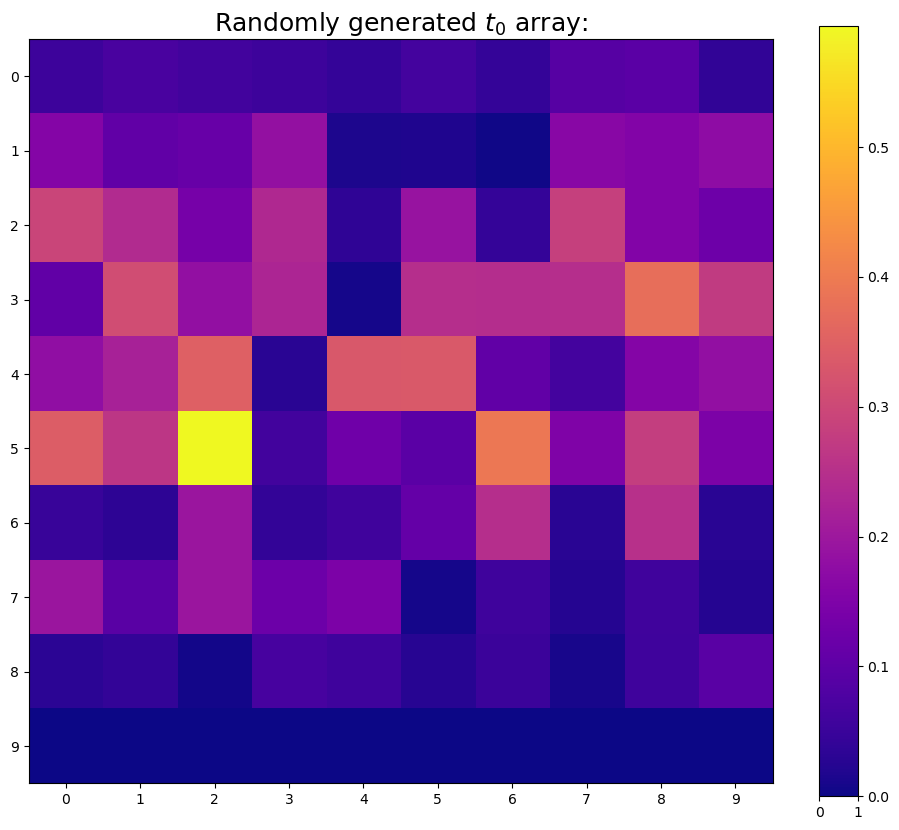

In [3]:
# A quick plot of the above t_0 array:
fig, ax = plt.subplots(figsize=(12,10))
im = ax.imshow(t_0, cmap='plasma')
# red_x = ax.text(centre[1], centre[0], 'X', c='r', label='Centre coordinate')
# black_x = ax.text(coord2[0], coord2[1], 'X', c='black', label='Inputted coordinate')

# The order of the tick bars here is important. This is to make the ricks display regularly.
loc = plticker.MultipleLocator(base=1.0)
cbar = fig.colorbar(im)
cbar.ax.xaxis.set_major_locator(loc)

ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_title('Randomly generated $t_0$ array:', fontsize=18)

plt.show()

### Implementing the Zipf distribution, helper functions:

The [Zipf distribution](https://en.wikipedia.org/wiki/Zipf%27s_law#Mathematical_explanation):

### ${\displaystyle f(k;s,N)={\frac {1/k^{s}}{\sum \limits _{n=1}^{N}(1/n^{s})}}}$

Where we let:

- N be the number of elements;
- k be their rank;
- s be the value of the exponent characterizing the distribution.

As far as I understand the definitions above, for the X by Y t_0 array:

- N = 10x10 = 100
- k = r = distance from the centre of the distribution (treating rank as a distance)
- s = some value in range [1,4].


In [4]:
def zipf(r, N=100, s=1):
    """ Here I am trying to functionalise the above distribution, where r = k = distance from centre.
        Further changes can be made as well, but for now I just fixed the values of N and s."""
    iterator = np.array([1/n for n in range(1, N)]).sum()
    return np.array((1/(r**s)))/iterator

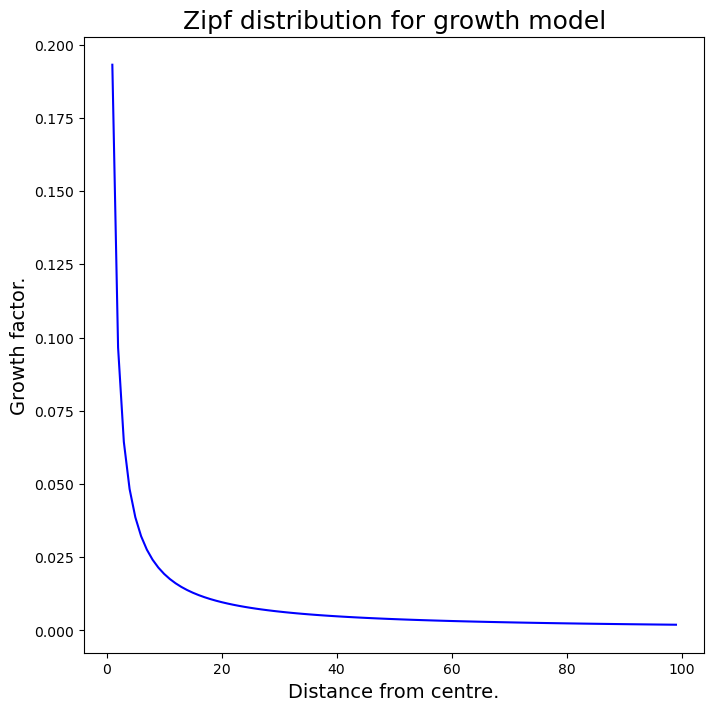

In [5]:
# Let us plot the above zipf distribution:
x = np.arange(1,100)
y = zipf(x)

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x,y, c='b')
ax.set_ylabel('Growth factor.', fontsize=14)
ax.set_xlabel('Distance from centre.', fontsize=14)
ax.set_title('Zipf distribution for growth model', fontsize=18)
plt.show()

Now let us make a euclidean distance helper function, that returns the distance from the centre
of the distribution. This function needs to:
- Find the centre of the np array (The area that has the highest peak in the contour plot)
- I should visually verify that the above step works.
- Then returns the euclidean distance, r, between the centre and any other point in the array.

Euclidean distance formula:
### $d(\mathbf {p,q})= \sqrt{\sum \limits_{i=1}^n (q_i-p_i)^2}$
- p,q	=	two points in Euclidean n-space
- q_i, p_i	=	Euclidean vectors, starting from the origin of the space (initial point)
- n	=	n-space


In [43]:
def r_distance(array, coord2, plots=False, output=False, centre_in=None):
    """Here the coords that are passed in are that of the element we want to find the distance of."""
    # The location of the peak of the distribution will always just be the highest probability.
    # We could make this more concrete, by using a kernel and making sure it isn't an anomaly?
    # However this shouldn't happen, since in the application of this code we will use normalised tiles anyways.

    if centre_in:
        centre = centre_in
    else:
        centre = np.where(array == array.max())
    if output:
        print(f'Indices of centre is {centre}, with probability of {array[centre]}')
    
    if plots is True:
        fig, ax = plt.subplots(figsize=(12,10))
        vmin = array.min()
        vmax = array.max()
        im = ax.imshow(array, cmap='plasma', vmin=vmin, vmax=vmax)
        red_x = ax.text(centre[1], centre[0], 'X', c='r', label='Centre coordinate')
        black_x = ax.text(coord2[1], coord2[0], 'X', c='black', label='Inputted coordinate')

        # The order of the tick bars here is important. This is to make the ricks display regularly.
        loc = plticker.MultipleLocator(base=1.0)
        cbar = fig.colorbar(im)
        cbar.ax.xaxis.set_major_locator(loc)

        ax.xaxis.set_major_locator(loc)
        ax.yaxis.set_major_locator(loc)
        ax.set_title('Distribution centre.', fontsize=18)
        
        # Now let's add a legend:
        red_patch = mpatches.Patch(color='red', label='Centre coordinate')
        black_patch = mpatches.Patch(color='black', label='Inputted coordinate')
        ax.legend(handles=[red_patch, black_patch], loc='upper right')

        plt.show()
    
    #make a tuple out of the centre coord for ease of calculation:
    coord1 = (centre[0][0], centre[1][0])
    
    return np.sqrt((coord2[0]-coord1[0])**2 + (coord2[1]-coord1[1])**2)

Indices of centre is (array([5]), array([2])), with probability of [0.5930243]


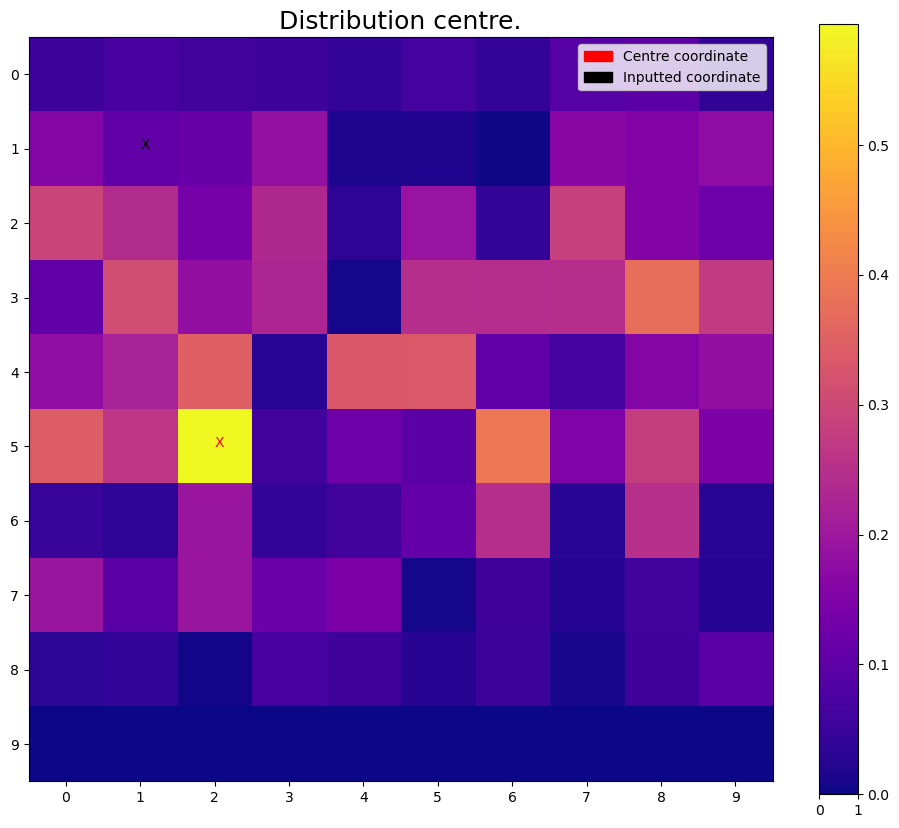

Probability chosen is (0.1057789839505809), and its r value is (4.123105625617661), with coordinate (1,1)


In [44]:
r = r_distance(t_0, (1,1), plots=True, output=True)
print(f'Probability chosen is ({t_0[1,1]}), and its r value is ({r}), with coordinate (1,1)')
# Test this with numpy built-in:

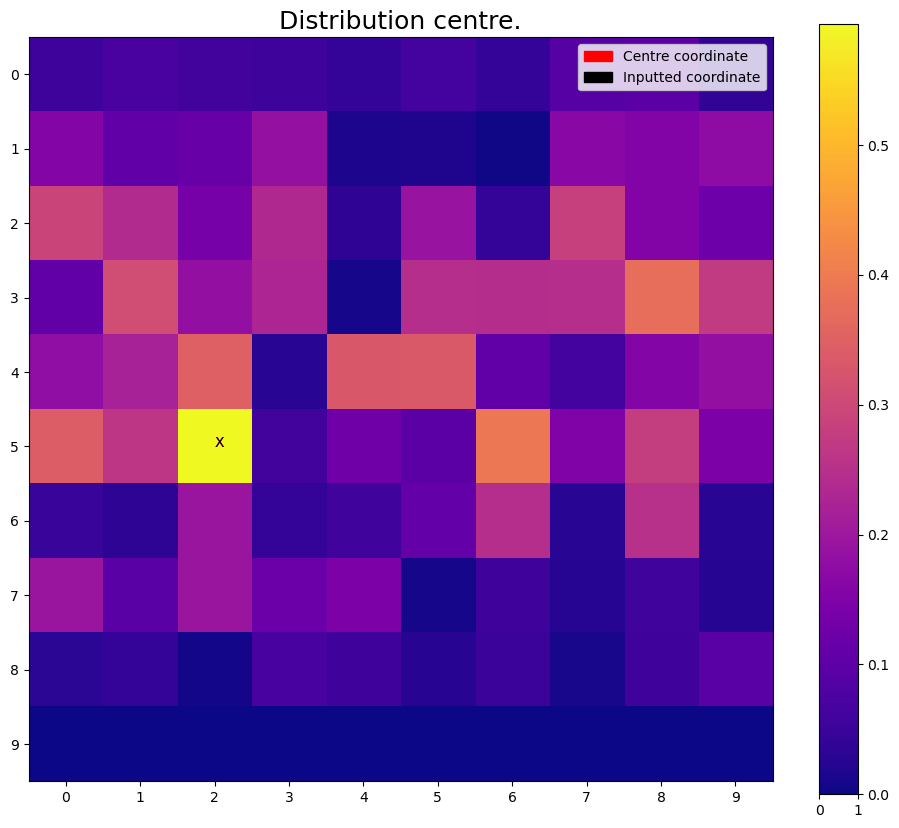

0.0

In [45]:
# Checking that the code doesn't break when the centre's coordinates are fed:
r = r_distance(t_0, (5, 2), plots=True)
r # We see the outputted value is zero, which is what we expect, so the distance works!

In [46]:
# Now let us see what probability the zipf function returns, given the 1,1 coordinate's r value found earlier:
r = r_distance(t_0, (1,1))
r, zipf(r)

(4.123105625617661, 0.046845265621446426)

### Now combining the above probability plot with the Zipf growth model
The idea here is to implement the model that Joe and I proposed:
### $p_{n, t+1} = \displaystyle \sum \limits_{n=0}^n p_{n, t} + g_{n, t}\times W$

Where:
- $t$ = timestep, starting at zero.
- $n$ = the current tile that the growth model is applied to.
- $g$ = output of the Zipf model.
- $W$ = weight (to be used later for areas that will have no/limited growth, i.e. rivers, steep hills.

Here I have purely added the summation to indicate that this model is to be applied over all n pixels/tiles.

In [47]:
g = []
for x, i in enumerate(t_0):
    temp = []
    for y, j in enumerate(range(0, len(i))):
        temp.append(zipf(r_distance(t_0, (x,y))))
    g.append(temp)
        
g = np.asarray(g)
g, g.shape

/tmp/ipykernel_17019/2955179995.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return np.array((1/(r**s)))/iterator


(array([[0.03586668, 0.03787943, 0.0386296 , 0.03787943, 0.03586668,
         0.0331246 , 0.03016465, 0.02731525, 0.02473006, 0.022453  ],
        [0.0431892 , 0.04684527, 0.04828699, 0.04684527, 0.0431892 ,
         0.0386296 , 0.03414406, 0.03016465, 0.02678481, 0.02395706],
        [0.05356961, 0.06107875, 0.06438266, 0.06107875, 0.05356961,
         0.04552542, 0.0386296 , 0.0331246 , 0.0287928 , 0.02536157],
        [0.06828812, 0.0863784 , 0.09657399, 0.0863784 , 0.06828812,
         0.05356961, 0.0431892 , 0.03586668, 0.03053938, 0.02653092],
        [0.0863784 , 0.13657625, 0.19314798, 0.13657625, 0.0863784 ,
         0.06107875, 0.04684527, 0.03787943, 0.03175333, 0.02731525],
        [0.09657399, 0.19314798,        inf, 0.19314798, 0.09657399,
         0.06438266, 0.04828699, 0.0386296 , 0.03219133, 0.02759257],
        [0.0863784 , 0.13657625, 0.19314798, 0.13657625, 0.0863784 ,
         0.06107875, 0.04684527, 0.03787943, 0.03175333, 0.02731525],
        [0.06828812, 0.0863

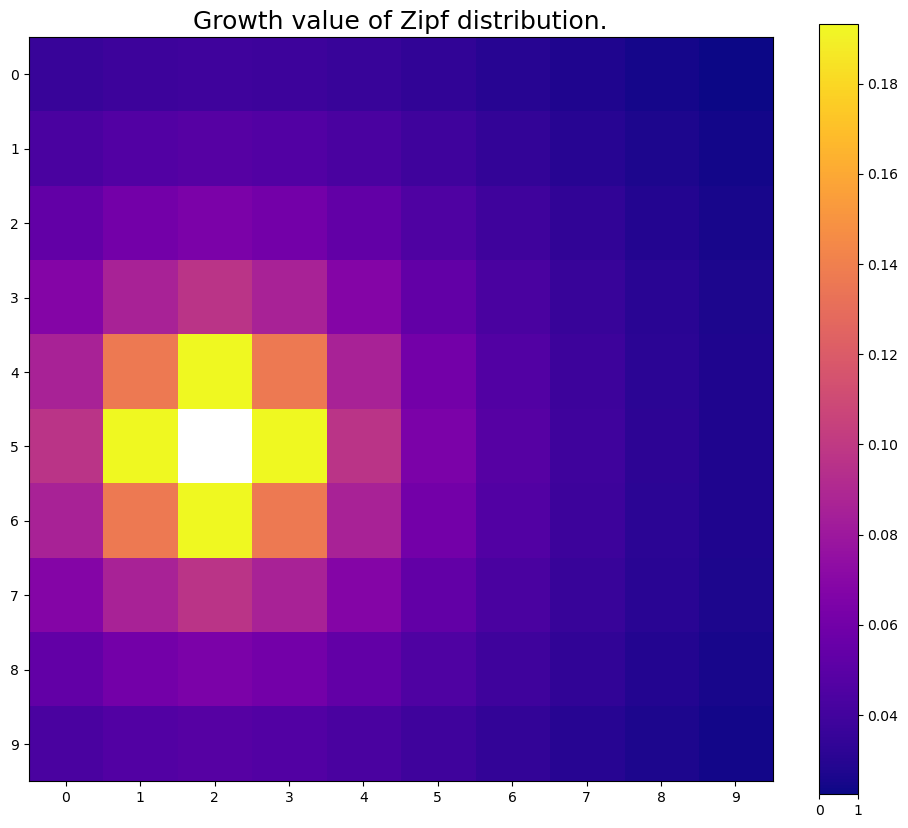

In [48]:
fig, ax = plt.subplots(figsize=(12,10))
im = ax.imshow(g, cmap='plasma')
# red_x = ax.text(centre[1], centre[0], 'X', c='r', label='Centre coordinate')
# black_x = ax.text(coord2[0], coord2[1], 'X', c='black', label='Inputted coordinate')

# The order of the tick bars here is important. This is to make the ricks display regularly.
loc = plticker.MultipleLocator(base=1.0)
cbar = fig.colorbar(im)
cbar.ax.xaxis.set_major_locator(loc)

ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_title('Growth value of Zipf distribution.', fontsize=18)

plt.show()

In [49]:
# Now let's simply do t_1 = t_0 +g:
t_1 = t_0 + g
t_1

array([[0.09074803, 0.10939837, 0.09890593, 0.09236775, 0.07823216,
        0.09771402, 0.07392337, 0.11649255, 0.12109634, 0.06079715],
       [0.20153421, 0.15262425, 0.16189591, 0.23196459, 0.05739641,
        0.05605546, 0.03818774, 0.19668862, 0.18241616, 0.19795949],
       [0.34715511, 0.30082632, 0.20282647, 0.29523751, 0.08905194,
        0.23750172, 0.08163558, 0.31652528, 0.1853473 , 0.14976015],
       [0.17411037, 0.39607188, 0.27903412, 0.31375198, 0.07580404,
        0.30062381, 0.28802749, 0.28264028, 0.40803861, 0.29925903],
       [0.26613235, 0.35509222, 0.54196358, 0.16668898, 0.41976176,
        0.39639769, 0.15203655, 0.10234258, 0.18946751, 0.20917063],
       [0.43869205, 0.45630889,        inf, 0.25437486, 0.22190004,
        0.16116837, 0.44015199, 0.19060456, 0.31197779, 0.17424792],
       [0.13406928, 0.16968879, 0.39004686, 0.17803113, 0.14535311,
        0.1716963 , 0.29314323, 0.06700982, 0.2831368 , 0.05614477],
       [0.26358002, 0.18010864, 0.2919262

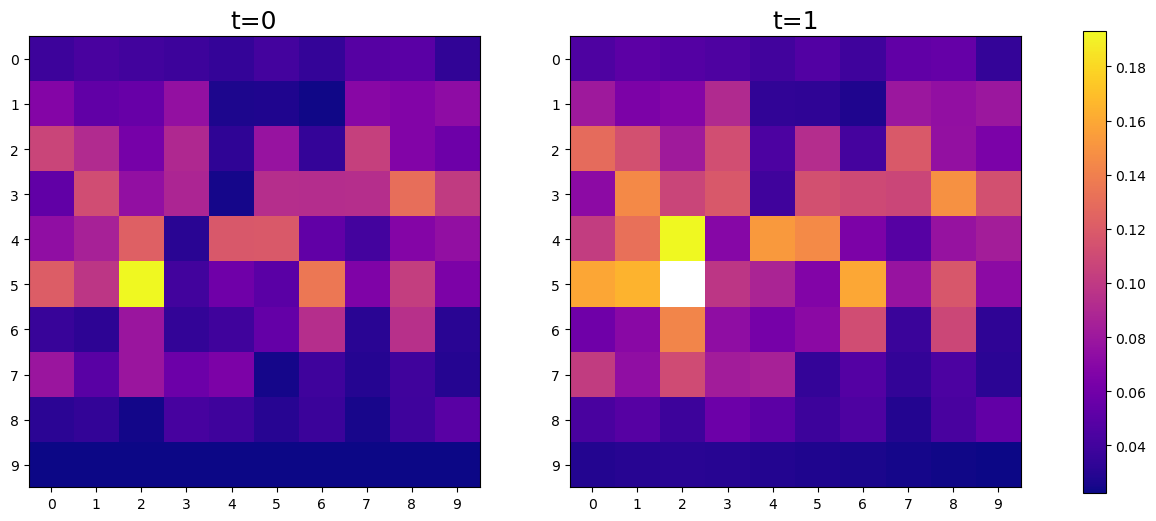

In [50]:
fig, ax = plt.subplots(1,2, figsize=(16,6), gridspec_kw={'width_ratios': [1, 1]})
im0 = ax[0].imshow(t_0, cmap='plasma')
im1 = ax[1].imshow(t_1, cmap='plasma')

# The order of the tick bars here is important. This is to make the ricks display regularly.
loc = plticker.MultipleLocator(base=1.0)

# cbar0 = fig.colorbar(im0)
# cbar0.ax.xaxis.set_major_locator(loc)

# cbar1 = fig.colorbar(im1)
# cbar1.ax.xaxis.set_major_locator(loc)

fig.colorbar(im, ax=ax.ravel().tolist())

ax[0].xaxis.set_major_locator(loc)
ax[0].yaxis.set_major_locator(loc)
ax[0].set_title('t=0', fontsize=18)

ax[1].xaxis.set_major_locator(loc)
ax[1].yaxis.set_major_locator(loc)
ax[1].set_title('t=0', fontsize=18)
ax[1].set_title('t=1', fontsize=18)

# plt.tight_layout()
plt.show()

In [51]:
# functionalise growth to run with more timesteps
# Incorporate edge detection into this model
# calc regression line for different years of growth for rolleston, adapt this model for verification and prediction
# Use similar cities to predict the growth rates of similar cities, i.e. rolleston and lincoln
# similarity can be measured by doing regression
# Use inspection for finding centre

# use each pixel as the centre for one update; convolve through entire dataset and use weights to prevent
# large overlapping growth. Divide by total number of pixels to get absolute growth
# rolleston data years= 2018, 2019, 2020 -> regression line -> 2021 2022 2023
# above model timesteps= t0, t1, t2 -> fit zipf to observations -> t3, t4, t5

# Work on next:
# 1. Do the for loop that Joe mentioned, that is explained in more detail above.
# 2. Update the documentation and the literature review with new methodology. (keep fresh and make report writing easier)
# 3. Apply Sobel operator on NN output for edge detection -> put into new model above.
# 4. Verify the mathematical model.
# 5. Predict growth with mathematical model.
# 6. Apply to other areas.

In [52]:
# how to add the iterative method:
# use a kernel like this video proposes: https://www.youtube.com/watch?v=C_zFhWdM4ic&t=0s
# some notes: I should output the centre of the kernel to a new array

## Next step is to figure out how to implement the above growth value using a kernel.
The requirements we have are:
- The Zipf distribution we are matching to is cumulative. As such we should think about taking the numerical integral,
    under the range of the centre of the kernel to the value in question.
- For implementing the growth model, I am using a convolving kernel using CV2's [filter2D](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)

In [53]:
import cv2 as cv
print(cv.__version__)

4.5.5


In [80]:
# for now let us just make a 3x3 kernel
kernel = np.ones((3,3), np.float32)
kernel.shape
kernel

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

The filter2D function actually computes correlation, not convolution:

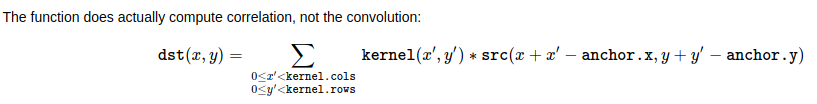

In [55]:
# Show kernel formula image
from IPython.display import Image
Image(r'/home/shaun/PHYS_391B/kernel.png')

So it is important to note that as long as the kernel is symmetrical, it doesn't matter, but if not, then it will rotate the image 180 degrees.
To keep the application of the kernel symmetrical, probabalistic and consistent, I need to construct the kernel such that:
- The middle of the kernel is 1, so it doesn't change the center, otherwise the distance of 0 will just cause a divide by 0 error.
- The outsides of the kernel should be calculated using the distance from centre formula in `r_distance`.
- I can then pass in the value of the kernel coordinate to the `zipf` function, but I am unsure which "base" values to use.
- For a 3x3 kernel, we will preserve the probabilistic nature of the distribution, but for anything larger, I need to incorporate some cumulative method.


In [67]:
new_kernel = []
for i, x in enumerate(kernel):
    temp = []
    # print(x)
    for y in range(0, len(x)):
        # print(y)
        if (i, y)==(1,1): # Make this automatic based off of kernel shape.
            temp.append(1)
        else:
            temp.append(zipf(r_distance(kernel, (i,y), centre_in=((1,1), (1,1))))) # This also needs to be updated to be shape independent
    new_kernel.append(temp)
        
new_kernel = np.asarray(new_kernel)
new_kernel, new_kernel.shape # This cell's code only works for a 3x3 kernel at the moment!!
# I am unsure if I need to divide by the area of the filter here? TODO: Ask Joe this.

(array([[0.13657625, 0.19314798, 0.13657625],
        [0.19314798, 1.        , 0.19314798],
        [0.13657625, 0.19314798, 0.13657625]]),
 (3, 3))

In [84]:
new_kernel[1,1]

1.0

In [85]:
# Now we can hopefully apply the above kernel:
new_t1 = cv.filter2D(t_0, -1, kernel, anchor=(1,1))
new_t1

array([[0.93772517, 0.94214243, 0.99529804, 0.78300104, 0.59494801,
        0.22206711, 0.57351245, 0.88170029, 1.21620323, 1.20160696],
       [1.34090284, 1.23618641, 1.20314095, 0.87815048, 0.839813  ,
        0.45685498, 0.90390191, 1.03846245, 1.28439923, 1.15384941],
       [1.86819281, 1.64748564, 1.73638454, 1.13836997, 1.16031348,
        0.80554978, 1.44504256, 1.67827128, 1.95751245, 1.95049929],
       [2.11507574, 2.01683826, 1.92932163, 1.53774621, 1.64237611,
        1.5437666 , 1.76202242, 1.67944088, 1.86538741, 1.96251789],
       [2.21043498, 2.54336465, 2.2343836 , 1.90923857, 1.46409738,
        1.88727874, 1.88426512, 2.02010614, 1.87945044, 2.2312386 ],
       [1.59914174, 2.22309109, 1.78632271, 1.78921741, 1.19320082,
        1.80376056, 1.53164493, 1.67780685, 1.29179287, 1.73510849],
       [1.36510821, 1.96037992, 1.59892996, 1.54107975, 0.77104517,
        1.24211866, 1.11510983, 1.49026699, 0.99477305, 1.38002637],
       [0.61131925, 0.84171601, 0.7986061

In [82]:
cv.filter2D?

Docstring:
filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
.   @brief Convolves an image with the kernel.
.   
.   The function applies an arbitrary linear filter to an image. In-place operation is supported. When
.   the aperture is partially outside the image, the function interpolates outlier pixel values
.   according to the specified border mode.
.   
.   The function does actually compute correlation, not the convolution:
.   
.   \f[\texttt{dst} (x,y) =  \sum _{ \substack{0\leq x' < \texttt{kernel.cols}\\{0\leq y' < \texttt{kernel.rows}}}}  \texttt{kernel} (x',y')* \texttt{src} (x+x'- \texttt{anchor.x} ,y+y'- \texttt{anchor.y} )\f]
.   
.   That is, the kernel is not mirrored around the anchor point. If you need a real convolution, flip
.   the kernel using #flip and set the new anchor to `(kernel.cols - anchor.x - 1, kernel.rows -
.   anchor.y - 1)`.
.   
.   The function uses the DFT-based algorithm in case of sufficiently large kernels (~`11 x 11`

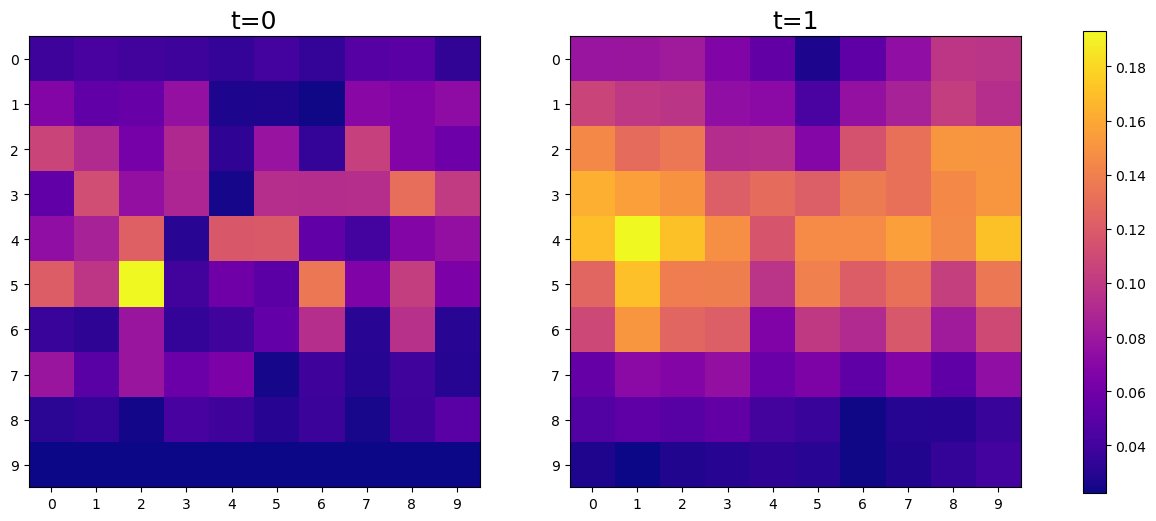

In [86]:
fig, ax = plt.subplots(1,2, figsize=(16,6), gridspec_kw={'width_ratios': [1, 1]})
im0 = ax[0].imshow(t_0, cmap='plasma')
im1 = ax[1].imshow(new_t1, cmap='plasma')

# The order of the tick bars here is important. This is to make the ricks display regularly.
loc = plticker.MultipleLocator(base=1.0)

# cbar0 = fig.colorbar(im0)
# cbar0.ax.xaxis.set_major_locator(loc)

# cbar1 = fig.colorbar(im1)
# cbar1.ax.xaxis.set_major_locator(loc)

fig.colorbar(im, ax=ax.ravel().tolist())

ax[0].xaxis.set_major_locator(loc)
ax[0].yaxis.set_major_locator(loc)
ax[0].set_title('t=0', fontsize=18)

ax[1].xaxis.set_major_locator(loc)
ax[1].yaxis.set_major_locator(loc)
ax[1].set_title('t=0', fontsize=18)
ax[1].set_title('t=1', fontsize=18)

# plt.tight_layout()
plt.show()

I think the above t1 has done the 180 inversion, in spite of using a symmetric kernel.
Let us try to fix this by flipping the `new_t1` array and plotting things again:

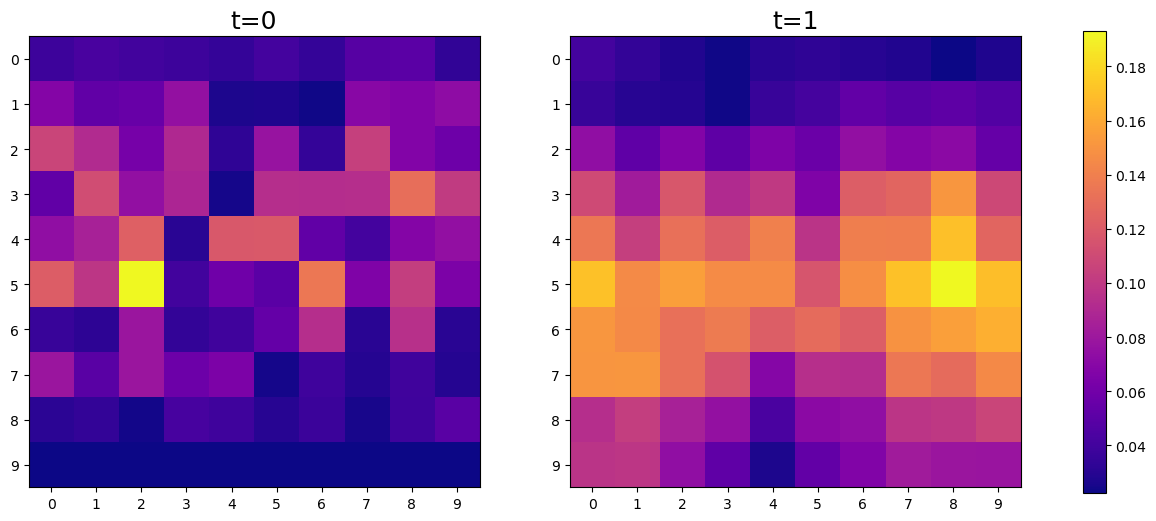

In [87]:
flipped = np.rot90(new_t1, 2)
# inverted = np.reshape(flipped, -1)

fig, ax = plt.subplots(1,2, figsize=(16,6), gridspec_kw={'width_ratios': [1, 1]})
im0 = ax[0].imshow(t_0, cmap='plasma')
im1 = ax[1].imshow(flipped, cmap='plasma')

# The order of the tick bars here is important. This is to make the ricks display regularly.
loc = plticker.MultipleLocator(base=1.0)

# cbar0 = fig.colorbar(im0)
# cbar0.ax.xaxis.set_major_locator(loc)

# cbar1 = fig.colorbar(im1)
# cbar1.ax.xaxis.set_major_locator(loc)

fig.colorbar(im, ax=ax.ravel().tolist())

ax[0].xaxis.set_major_locator(loc)
ax[0].yaxis.set_major_locator(loc)
ax[0].set_title('t=0', fontsize=18)

ax[1].xaxis.set_major_locator(loc)
ax[1].yaxis.set_major_locator(loc)
ax[1].set_title('t=0', fontsize=18)
ax[1].set_title('t=1', fontsize=18)

# plt.tight_layout()
plt.show()